### Generating Discrete Random Variables using SciPy and NumPy

In this notebook, we will:

- Generate random samples from several discrete distributions:
  - **Bernoulli**
  - **Binomial**
  - **Geometric**
  - **Negative Binomial**
  - **Hypergeometric**
  - **Poisson**
- Plot their **Probability Mass Function (PMF)** and **Cumulative Distribution Function (CDF)**
- Discuss and show the theoretical **Moment Generating Functions (MGF)**
- Calculate expectations, variances, and higher-order moments.

We will use `scipy.stats` for most distributions and `numpy` for sample generation where applicable.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### 1. Bernoulli Distribution


In [2]:
p = 0.3

# Create a scipy.stats bernoulli object
bernoulli_dist = stats.bernoulli(p)

# Generate a sample of 100 points
sample_size = 100
bernoulli_sample = bernoulli_dist.rvs(size=sample_size)
bernoulli_sample

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [3]:
bernoulli_dist

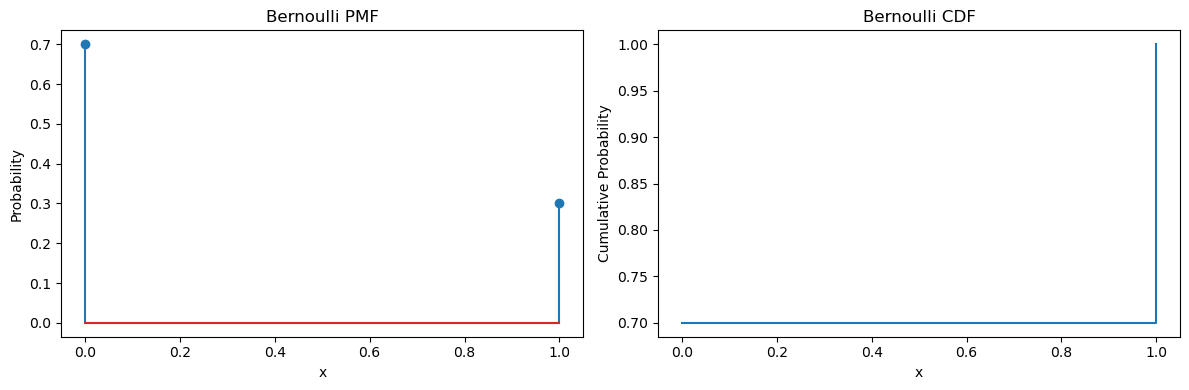

In [4]:
x = [0, 1]
pmf_vals = bernoulli_dist.pmf(x)
cdf_vals = bernoulli_dist.cdf(x)

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].stem(x, pmf_vals)
ax[0].set_title('Bernoulli PMF')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Probability')

ax[1].step(x, cdf_vals, where='post')
ax[1].set_title('Bernoulli CDF')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

Bernoulli Mean (theoretical): 0.3
Bernoulli Variance (theoretical): 0.21


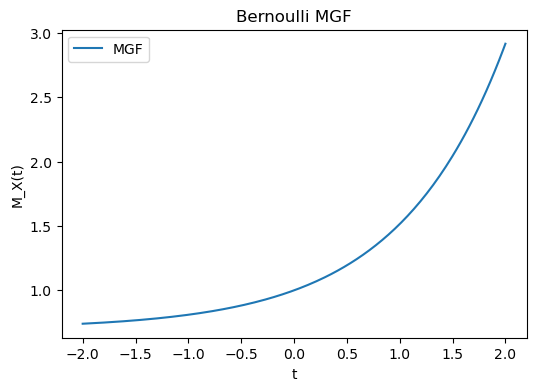

In [5]:
mean_bern = bernoulli_dist.mean()
var_bern = bernoulli_dist.var()

print("Bernoulli Mean (theoretical):", mean_bern)
print("Bernoulli Variance (theoretical):", var_bern)

# Define a function for the MGF of a Bernoulli random variable:
def mgf_bernoulli(t, p):
    return (1-p) + p * np.exp(t)

# Example: Compute and plot the MGF for a range of t values
t_values = np.linspace(-2, 2, 200)
mgf_values = mgf_bernoulli(t_values, p)

plt.figure(figsize=(6,4))
plt.plot(t_values, mgf_values, label='MGF')
plt.title('Bernoulli MGF')
plt.xlabel('t')
plt.ylabel('M_X(t)')
plt.legend()
plt.show()

#### Binomial distribution

In [6]:
n = 10
p_binom = 0.5

binom_dist = stats.binom(n, p_binom)
x_binom = np.arange(0, n+1)
pmf_binom = binom_dist.pmf(x_binom)
cdf_binom = binom_dist.cdf(x_binom)

In [7]:
binom_dist.pmf(5)

0.2460937500000002

In [8]:
binom_dist.cdf(5) # Why is it not one half? because 5 is included in P(X<=5)

0.623046875

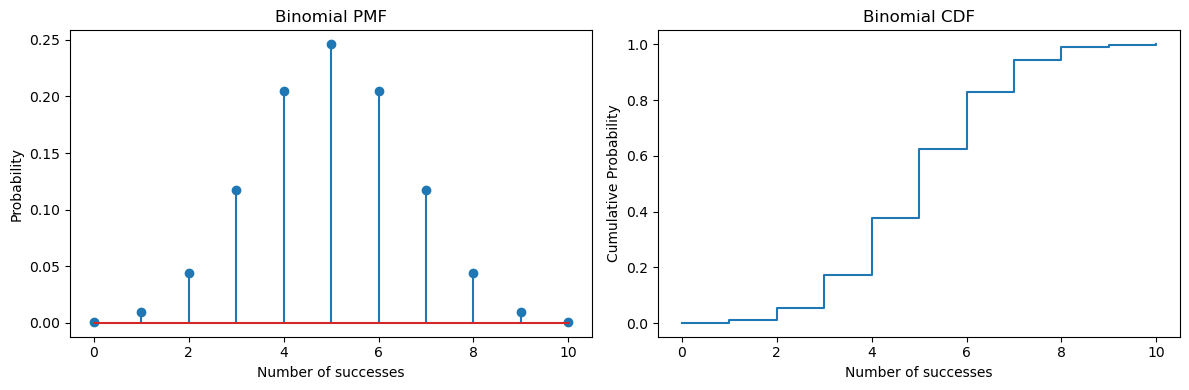

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].stem(x_binom, pmf_binom)
ax[0].set_title('Binomial PMF')
ax[0].set_xlabel('Number of successes')
ax[0].set_ylabel('Probability')

ax[1].step(x_binom, cdf_binom, where='post')
ax[1].set_title('Binomial CDF')
ax[1].set_xlabel('Number of successes')
ax[1].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

Binomial Mean (theoretical): 5.0
Binomial Variance (theoretical): 2.5


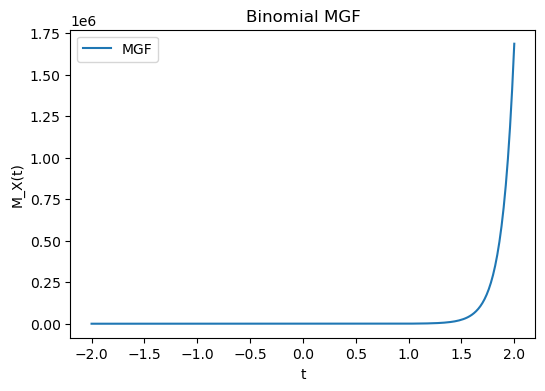

In [10]:
mean_binom = binom_dist.mean()
var_binom = binom_dist.var()
print("Binomial Mean (theoretical):", mean_binom)
print("Binomial Variance (theoretical):", var_binom)

# Define Binomial MGF function: M(t) = (1-p + p*exp(t))^n
def mgf_binom(t, n, p):
    return (1-p + p * np.exp(t))**n

t_values = np.linspace(-2, 2, 200)
mgf_binom_vals = mgf_binom(t_values, n, p_binom)

plt.figure(figsize=(6,4))
plt.plot(t_values, mgf_binom_vals, label='MGF')
plt.title('Binomial MGF')
plt.xlabel('t')
plt.ylabel('M_X(t)')
plt.legend()
plt.show()


In [11]:
np.random.seed(144)

n = 5
p = 0.2

stats.binom.rvs(n, p, size=7)

array([0, 2, 1, 0, 1, 1, 1])

In [12]:
n = 10
p = 0.5
k = 5 # X value

stats.binom.pmf(k ,n, p)

0.2460937500000002

In [13]:
n = 10
p = 0.5
k = 5 # X value

stats.binom.cdf(k ,n, p)

0.623046875

In [14]:
n = 10
p = 0.5
q = 0.5 # target quantile value

stats.binom.ppf(q ,n, p) # Percent point function (inverse of cdf — percentiles)

5.0

In [15]:
stats.binom.ppf([0.05,0.95] ,n, p) # 90% coverage

array([2., 8.])

In [16]:
mean, var, skew, kurt = stats.binom.stats(n, p, moments='mvsk')
mean, var, skew, kurt

(5.0, 2.5, 0.0, -0.2)

#### Geometric Distribution

In [17]:
p_geo = 0.4

geom_dist = stats.geom(p_geo)
# Define a reasonable support range (e.g., 1 to 15)
x_geom = np.arange(1, 16)
pmf_geom = geom_dist.pmf(x_geom)
cdf_geom = geom_dist.cdf(x_geom)

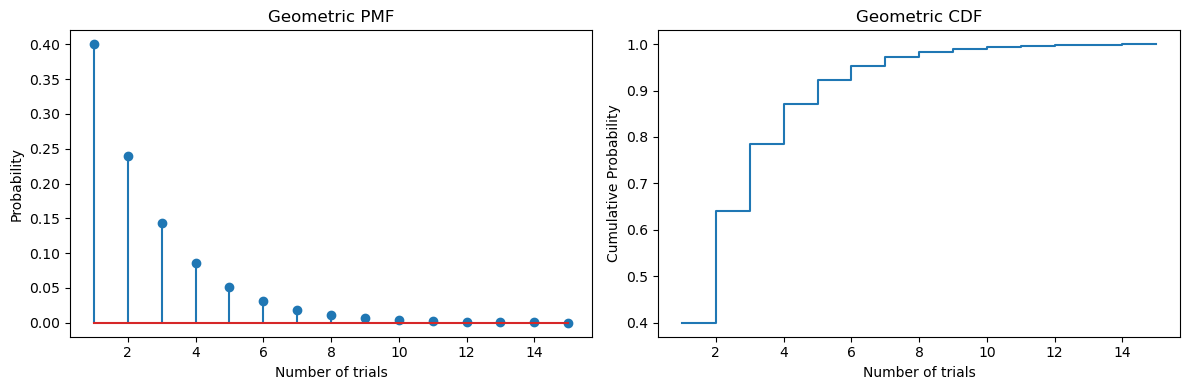

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].stem(x_geom, pmf_geom)
ax[0].set_title('Geometric PMF')
ax[0].set_xlabel('Number of trials')
ax[0].set_ylabel('Probability')

ax[1].step(x_geom, cdf_geom, where='post')
ax[1].set_title('Geometric CDF')
ax[1].set_xlabel('Number of trials')
ax[1].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

Geometric Mean (theoretical): 2.5
Geometric Variance (theoretical): 3.749999999999999


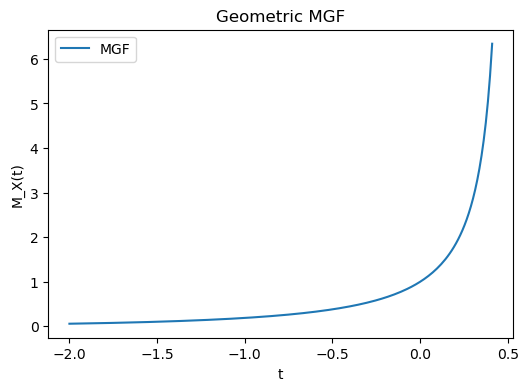

In [19]:
mean_geom = geom_dist.mean()
var_geom = geom_dist.var()
print("Geometric Mean (theoretical):", mean_geom)
print("Geometric Variance (theoretical):", var_geom)

# Define Geometric MGF function: M(t) = (p*e^t) / (1 - (1-p)*e^t)
def mgf_geom(t, p):
    # Only valid for t < -ln(1-p)
    return (p * np.exp(t)) / (1 - (1-p)*np.exp(t))

# Compute and plot the MGF for a valid range of t (e.g., t < -ln(1-p))
t_limit = -np.log(1-p_geo) - 0.1  # slightly below the limit
t_values = np.linspace(-2, t_limit, 200)
mgf_geom_vals = mgf_geom(t_values, p_geo)

plt.figure(figsize=(6,4))
plt.plot(t_values, mgf_geom_vals, label='MGF')
plt.title('Geometric MGF')
plt.xlabel('t')
plt.ylabel('M_X(t)')
plt.legend()
plt.show()

In [ ]:
# How to generate 10 random variables following Geo(0.2)

In [23]:
stats.geom.rvs(0.2, size=10)

array([ 8,  6,  2,  5,  1,  8,  2,  5,  2, 21])

In [ ]:
# How to calculate the probability that X<= 10 if X follows Geo(2)?

In [25]:
stats.geom.cdf(10, 0.2)

0.8926258176

In [ ]:
# How to check the minimum value K, such that the probability of X<= k is larger than 0.9,  if X follows Geo(2)?

In [27]:
stats.geom.ppf(0.9, 0.2)

11.0

#### Negative Binomial Distribution

In [28]:
r = 5      # number of successes
p_nb = 0.4 # probability of success

nbinom_dist = stats.nbinom(r, p_nb)
# Define support (e.g., failures from 0 to 30)
x_nbinom = np.arange(0, 31)
pmf_nbinom = nbinom_dist.pmf(x_nbinom)
cdf_nbinom = nbinom_dist.cdf(x_nbinom)

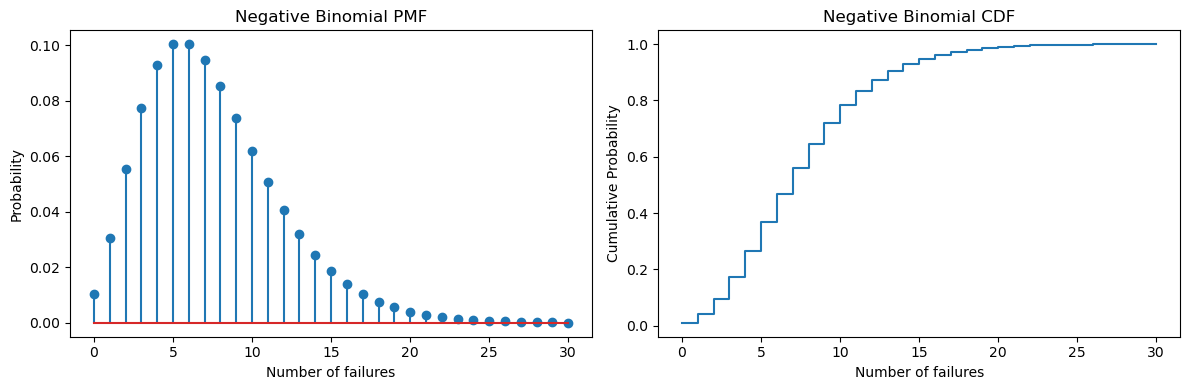

In [29]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].stem(x_nbinom, pmf_nbinom)
ax[0].set_title('Negative Binomial PMF')
ax[0].set_xlabel('Number of failures')
ax[0].set_ylabel('Probability')

ax[1].step(x_nbinom, cdf_nbinom, where='post')
ax[1].set_title('Negative Binomial CDF')
ax[1].set_xlabel('Number of failures')
ax[1].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()


Negative Binomial Mean (theoretical): 7.5
Negative Binomial Variance (theoretical): 18.749999999999996


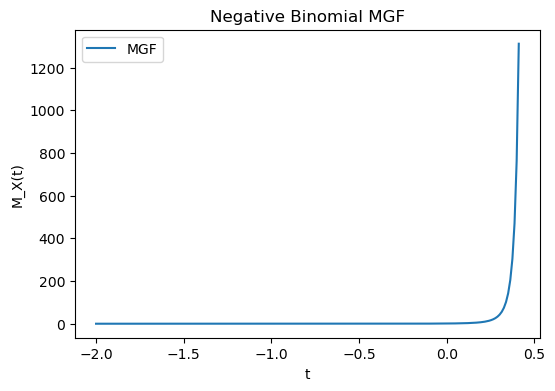

In [30]:
mean_nbinom = nbinom_dist.mean()
var_nbinom = nbinom_dist.var()
print("Negative Binomial Mean (theoretical):", mean_nbinom)
print("Negative Binomial Variance (theoretical):", var_nbinom)

# Define Negative Binomial MGF: M(t) = (p / (1 - (1-p)e^t))^r
def mgf_nbinom(t, r, p):
    return (p / (1 - (1-p)*np.exp(t)))**r

# Compute and plot the MGF for valid t values (t < -ln(1-p))
t_limit = -np.log(1-p_nb) - 0.1
t_values = np.linspace(-2, t_limit, 200)
mgf_nbinom_vals = mgf_nbinom(t_values, r, p_nb)

plt.figure(figsize=(6,4))
plt.plot(t_values, mgf_nbinom_vals, label='MGF')
plt.title('Negative Binomial MGF')
plt.xlabel('t')
plt.ylabel('M_X(t)')
plt.legend()
plt.show()

#### Hypergeometric Distribution

In [31]:
M = 20   # total population size
n_success = 7  # number of successes in population
N_draws = 12   # number of draws

hypergeom_dist = stats.hypergeom(M, n_success, N_draws)

# The support is the maximum feasible number of successes drawn:
x_min = max(0, N_draws - (M - n_success))
x_max = min(n_success, N_draws)
x_hyper = np.arange(x_min, x_max+1)
pmf_hyper = hypergeom_dist.pmf(x_hyper)
cdf_hyper = hypergeom_dist.cdf(x_hyper)

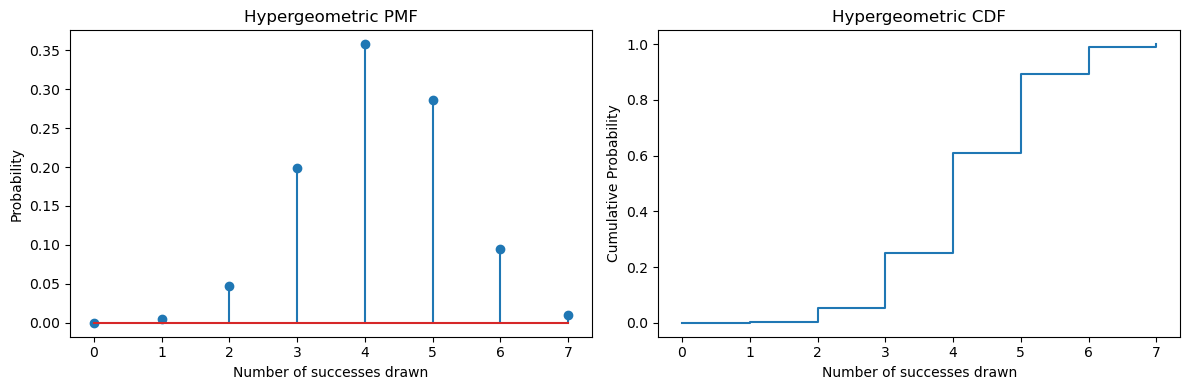

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].stem(x_hyper, pmf_hyper)
ax[0].set_title('Hypergeometric PMF')
ax[0].set_xlabel('Number of successes drawn')
ax[0].set_ylabel('Probability')

ax[1].step(x_hyper, cdf_hyper, where='post')
ax[1].set_title('Hypergeometric CDF')
ax[1].set_xlabel('Number of successes drawn')
ax[1].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

In [33]:
mu = 3

poisson_dist = stats.poisson(mu)
# Define a support range (e.g., 0 to 15)
x_poisson = np.arange(0, 16)
pmf_poisson = poisson_dist.pmf(x_poisson)
cdf_poisson = poisson_dist.cdf(x_poisson)

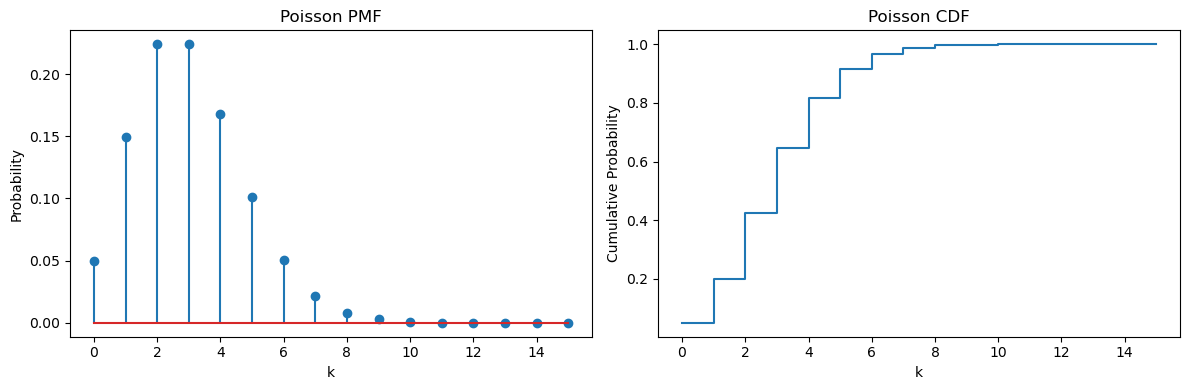

In [34]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].stem(x_poisson, pmf_poisson)
ax[0].set_title('Poisson PMF')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Probability')

ax[1].step(x_poisson, cdf_poisson, where='post')
ax[1].set_title('Poisson CDF')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()


Poisson Mean (theoretical): 3.0
Poisson Variance (theoretical): 3.0


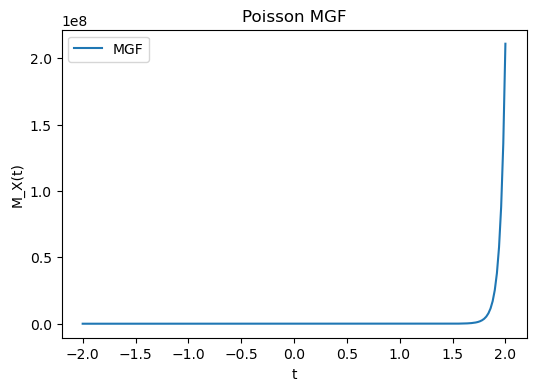

In [35]:
mean_poisson = poisson_dist.mean()
var_poisson = poisson_dist.var()
print("Poisson Mean (theoretical):", mean_poisson)
print("Poisson Variance (theoretical):", var_poisson)

# Define Poisson MGF: M(t) = exp(mu*(e^t - 1))
def mgf_poisson(t, mu):
    return np.exp(mu * (np.exp(t) - 1))

t_values = np.linspace(-2, 2, 200)
mgf_poisson_vals = mgf_poisson(t_values, mu)

plt.figure(figsize=(6,4))
plt.plot(t_values, mgf_poisson_vals, label='MGF')
plt.title('Poisson MGF')
plt.xlabel('t')
plt.ylabel('M_X(t)')
plt.legend()
plt.show()

In [ ]:
# How to generate 10 random variables following Poi(5)

In [36]:
stats.poisson.rvs(5, size=10)

array([7, 2, 5, 8, 3, 5, 4, 3, 2, 3])

In [ ]:
# How to calculate the probability that X<= 10 if X follows Poi(5)?

In [37]:
stats.poisson.cdf(10, 5)

0.9863047314016171

In [ ]:
# How to check the minimum value K, such that the probability of X<= k is larger than 0.9,  if X follows Poi(5)?

In [38]:
stats.poisson.ppf(0.9, 5)

8.0